In [4]:
import pandas as pd
import os
from data_preprocessing import preprocess_dataframe


In [5]:
from descriptor_calculation import descriptor_cal

In [6]:

# read data
df = pd.read_csv("All Properties with Finguprints_3.csv")
df.head()


,Sr.No,Smiles,Solvent,AbsorptioMax (nm),EmissionMax (nm),Fluorescent labeling,Total Molweight,molFormula,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,Druglikeness,Rotatable Bonds,Weiner
0,1,N#Cc1cc2ccc(O)cc2oc1=O,O,355.0,410.00,Yes,187.154,C10H5NO3,0.8375,-2.346,4,1,140.28,0.354290,70.32,-4.14950,0,288.0
1,2,N#Cc1cc2ccc([O-])cc2oc1=O,O,408.0,450.00,Yes,186.146,C10H4NO3,-0.7405,-2.346,4,0,141.46,0.359680,73.15,-4.14950,0,288.0
2,3,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,ClC(Cl)Cl,526.0,535.00,Yes,1061.540,C73H92N2O4,24.1650,-27.266,6,0,933.68,0.063469,74.76,-20.14900,39,55900.0
3,4,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CC#N,514.0,553.72,Yes,350.420,C23H12NOS,4.5981,-7.337,2,0,249.23,0.183000,64.19,0.73261,1,1522.0
4,5,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CS(C)=O,524.0,555.00,Yes,350.420,C23H12NOS,4.5981,-7.337,2,0,249.23,0.183000,64.19,0.73261,1,1522.0


In [7]:
# shape of original df 
print(f"original df have: [{df.shape[0]}] rows, [{df.shape[1]}] columns")

original df have: [32303] rows, [18] columns


In [8]:
# drop duplicates and encodes taget

df = preprocess_dataframe(df) # Note: control + click on any function to get inside that function

selectiong [smiles] and [Fluorescent] column...
droping repeated smiles...
adding new column where [ fluroscent=1 ] and [ Non-fluroscent=0 ]
after preprocessing: rows=[11986] , columns=[2]


In [9]:
# df after preprocessing 
df.head()

,Smiles,target
0,N#Cc1cc2ccc(O)cc2oc1=O,1
1,N#Cc1cc2ccc([O-])cc2oc1=O,1
2,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,1
3,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,1
5,CCN(CC)c1ccc2c(C)cc(=O)oc2c1,1


In [10]:
df.tail()

,Smiles,target
16222,ClC1=CC=CC=C1N1CCN(CCC(=O)NC2=CC=C3OCCOC3=C2)CC1,0
16239,CC(OC1=CC=CC=C1Cl)C(=O)N1CCN(CC(=O)N2CCCC2)CC1,0
24935,FC(F)(F)C1CCC(CC1)NC(=O)CN1CCN(CC1)C1=CC=CC=C1,0
20663,OC1=NC2=CC=CC=C2C(=C1)C(=O)N1CCC(CC2=CC=CC=C2)CC1,0
20096,COC1=CC=C(C=C1OC)C(=O)NC1=CC=CC2=C1CN(C2)C1CC1,0


In [11]:
df.columns

Index(['Smiles', 'target'], dtype='object')

In [12]:
# fluoroscent vs Non-flc value count

df["target"].value_counts()

1    5993
0    5993
Name: target, dtype: int64

In [13]:
# list of the descriptors which will be used in for loop 
descriptor_list= ["MorganFingerprints","MACCSKeysFingerprint","RDKitDescriptors"] 

In [14]:
# Loop through the list of descriptors
for descriptor in descriptor_list:

    # Call the descriptor_cal function to get X and Y

    X, Y = descriptor_cal(df, descriptor)  # control+click on  descriptor_cal to get the code of that function
    
    # Create folder & subforlders  : Smiles_Descriptors/MorganFingerprints .etc

    folder_path = os.path.join(os.getcwd(),"Smiles_Descriptors", f"{descriptor}")
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Save the X and Y DataFrames to separate CSV files in the Smiles_Descriptors/descriptor_name .etc folder

    x_file_path = os.path.join(folder_path, 'X.csv')
    y_file_path = os.path.join(folder_path, 'Y.csv')
    X.to_csv(x_file_path, index=False)
    Y.to_csv(y_file_path, index=False)

    print(f"X and y saved for [{descriptor}], path : [{folder_path}]")
    print(f"descriptors shape: {X.shape}")

X and y saved for [MorganFingerprints], path : [/Users/ganeshjadhav/Desktop/ML_Projects/Fluorescent_compound_prediction/Smiles_Descriptors/MorganFingerprints]
descriptors shape: (11986, 1024)
X and y saved for [MACCSKeysFingerprint], path : [/Users/ganeshjadhav/Desktop/ML_Projects/Fluorescent_compound_prediction/Smiles_Descriptors/MACCSKeysFingerprint]
descriptors shape: (11986, 167)
X and y saved for [RDKitDescriptors], path : [/Users/ganeshjadhav/Desktop/ML_Projects/Fluorescent_compound_prediction/Smiles_Descriptors/RDKitDescriptors]
descriptors shape: (11986, 208)


### Train Models

In [15]:
from train_func import train_models
import shutil
import os
import pandas as pd

# Define the path to the folder containing subfolders
path_to_descriptors = "Smiles_Descriptors" # path to descriptors folder
results_folder = "ClassificationScores"
if os.path.exists(results_folder):
    shutil.rmtree(results_folder)



# Loop over each subfolder
for subfolder_name in os.listdir(path_to_descriptors):
    
    # Define the path to the X.csv and Y.csv files for the current subfolder
    path_to_X = os.path.join(path_to_descriptors, subfolder_name, "X.csv")
    path_to_Y = os.path.join(path_to_descriptors, subfolder_name, "Y.csv")
    
    # Load the X.csv and Y.csv files as dataframes
    X = pd.read_csv(path_to_X)
    Y = pd.read_csv(path_to_Y)
    
    # Call the train_models function with X, Y, and the current subfolder name as the PATH argument
    train_models(X, Y, f"{results_folder}/{subfolder_name}")

/Users/ganeshjadhav/opt/anaconda3/envs/ML-for-LSD1-main/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ganeshjadhav/opt/anaconda3/envs/ML-for-LSD1-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ganeshjadhav/Desktop/ML_Projects/Fluorescent_compound_prediction/train_func.py:53: DataConversionWarning: A column-vector y was pas

### Plot scores

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

def plot_metrics(SCORES_FOLDER,METRIC_TO_PLOT):
        
    # Define a list to store the accuracy values for each csv file
    accuracy_values = []

    # Loop through each subfolder in folder1
    for subfolder in os.listdir(SCORES_FOLDER):
        subfolder_path = os.path.join(SCORES_FOLDER, subfolder)
        
        # Loop through each csv file in the subfolder
        for csv_file in os.listdir(subfolder_path):
            if csv_file.endswith('.csv'):
                csv_path = os.path.join(subfolder_path, csv_file)
                
                # Read the csv file into a pandas dataframe
                df = pd.read_csv(csv_path, index_col=[0])
                
                # Extract the accuracy value from the dataframe and append it to the list
                accuracy_value = df.loc[METRIC_TO_PLOT].values[0]
                accuracy_values.append((subfolder, csv_file[:-4], accuracy_value)) # Remove the last 4 characters (i.e. ".csv") from the csv file name

    # Convert the accuracy values list to a pandas dataframe
    df_accuracy = pd.DataFrame(accuracy_values, columns=['Subfolder', 'CSV File', METRIC_TO_PLOT])

    # Pivot the dataframe to have Subfolder as the index, CSV File as the columns, and Accuracy as the values
    df_accuracy_pivot = df_accuracy.pivot(index='Subfolder', columns='CSV File', values=METRIC_TO_PLOT)

    # Create a plot of the accuracy values
    plt.figure(figsize=(10, 5))
    for csv_file in df_accuracy_pivot.columns:
        plt.plot(df_accuracy_pivot.index, df_accuracy_pivot[csv_file], label=csv_file[:]) # Remove the last 4 characters (i.e. ".csv") from the csv file name
    plt.xlabel('Subfolder')
    plt.ylabel(METRIC_TO_PLOT)
    plt.legend()

    # Get the current date and time and format it for the filename
    now = datetime.datetime.now()

    # Define the path and filename for the plot
    plot_path = f'{SCORES_FOLDER[:-6]}plots'
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
        
    plot_name = os.path.join(plot_path, METRIC_TO_PLOT)

    # Save the plot
    plt.savefig(plot_name)

    # Show the plot
    plt.show()

    print(f"Compairison plots saved at: {plot_path}")

    return df_accuracy

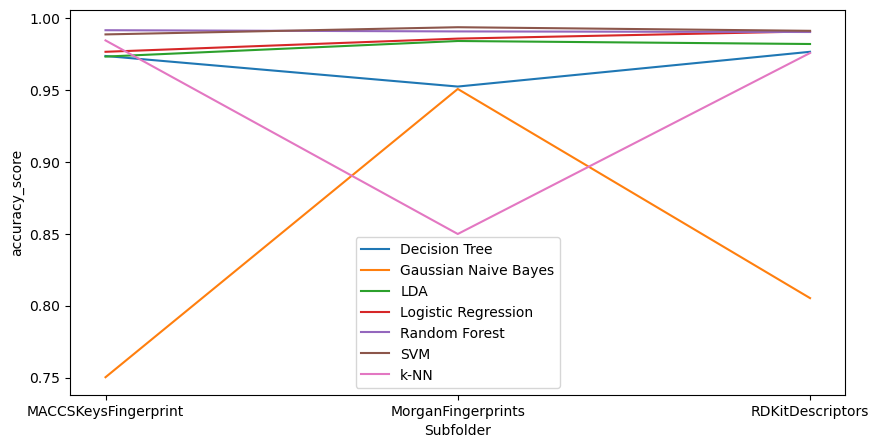

Compairison plots saved at: Classificationplots


,Subfolder,CSV File,accuracy_score
0,MACCSKeysFingerprint,k-NN,0.984570
1,MACCSKeysFingerprint,Random Forest,0.991660
2,MACCSKeysFingerprint,LDA,0.973311
3,MACCSKeysFingerprint,Gaussian Naive Bayes,0.750209
4,MACCSKeysFingerprint,Logistic Regression,0.976647
5,MACCSKeysFingerprint,Decision Tree,0.973728
6,MACCSKeysFingerprint,SVM,0.988741
7,MorganFingerprints,k-NN,0.849875
8,MorganFingerprints,Random Forest,0.990826
9,MorganFingerprints,LDA,0.984153


In [17]:
SCORES_FOLDER = "ClassificationScores"
METRIC_TO_PLOT = "accuracy_score"
plot_metrics(SCORES_FOLDER,METRIC_TO_PLOT)

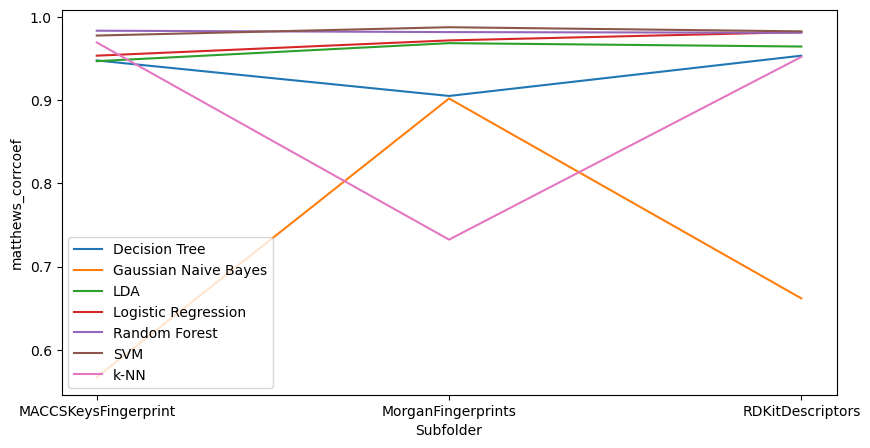

Compairison plots saved at: Classificationplots


,Subfolder,CSV File,matthews_corrcoef
0,MACCSKeysFingerprint,k-NN,0.969146
1,MACCSKeysFingerprint,Random Forest,0.983315
2,MACCSKeysFingerprint,LDA,0.946704
3,MACCSKeysFingerprint,Gaussian Naive Bayes,0.567007
4,MACCSKeysFingerprint,Logistic Regression,0.953321
5,MACCSKeysFingerprint,Decision Tree,0.947572
6,MACCSKeysFingerprint,SVM,0.977475
7,MorganFingerprints,k-NN,0.732311
8,MorganFingerprints,Random Forest,0.981646
9,MorganFingerprints,LDA,0.968341


In [18]:
SCORES_FOLDER = "ClassificationScores"
METRIC_TO_PLOT = "matthews_corrcoef"
plot_metrics(SCORES_FOLDER,METRIC_TO_PLOT)